# Practica bases de datos estudiantes

### Modelo entidad relación

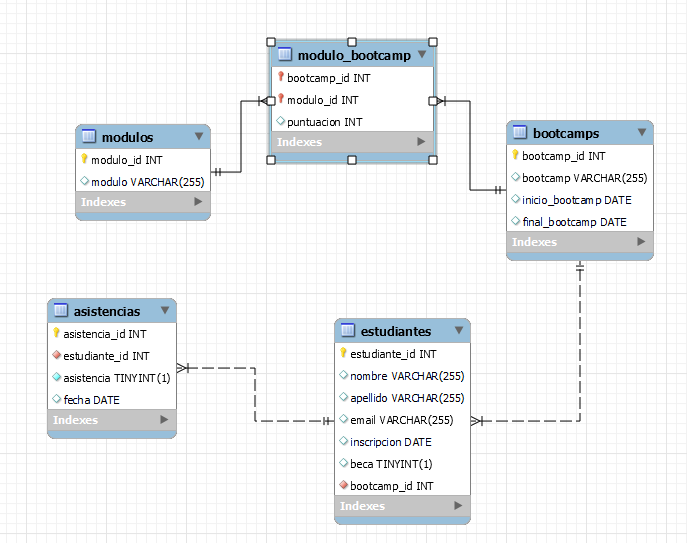

### Creación de tablas en MySQL:

```mysql
DROP DATABASE IF EXISTS estudiantes;
CREATE DATABASE estudiantes;
USE estudiantes;

CREATE TABLE modulos (
	modulo_id INT PRIMARY KEY AUTO_INCREMENT UNIQUE,
    modulos VARCHAR(255)
);


CREATE TABLE bootcamps (
	bootcamp_id INT PRIMARY KEY AUTO_INCREMENT UNIQUE,
    bootcamp VARCHAR(255),
    inicio_bootcamp  DATE,
    final_bootcamp DATE
);

CREATE TABLE modulo_bootcamp (
	bootcamp_id INT,
    modulo_id INT,
    puntuacion INT,
	FOREIGN KEY(bootcamp_id) REFERENCES bootcamps(bootcamp_id) ON DELETE CASCADE,
	FOREIGN KEY(modulo_id) REFERENCES modulos(modulo_id) ON DELETE CASCADE,
    PRIMARY KEY (bootcamp_id, modulo_id)
);

CREATE TABLE estudiantes (
	estudiante_id INT PRIMARY KEY AUTO_INCREMENT UNIQUE,
    nombre VARCHAR(255),
    apellido VARCHAR(255),
    email VARCHAR(255) UNIQUE,
    inscripcion DATE,
    BECA BOOLEAN,
    bootcamp_id INT,
	FOREIGN KEY(bootcamp_id) REFERENCES bootcamps(bootcamp_id) ON DELETE SET NULL
);

CREATE TABLE asistencias (
	asistencia_id INT PRIMARY KEY AUTO_INCREMENT UNIQUE,
    estudiante_id INT,
    asistencia TINYINT(1),
    fecha DATE,
	FOREIGN KEY(estudiante_id) REFERENCES estudiantes(estudiante_id) ON DELETE SET NULL
);
```

### Creación y carga de datos 

In [1]:
import pandas as pd

import mysql.connector
import random

from datetime import datetime, timedelta

In [2]:
def insert_to_table(data, table, database, host = "localhost", user = "root", password = "password", port = 3307, pk = True):
    
    db = mysql.connector.connect(host     = host,
                                 port     = port,
                                 user     = user,
                                 password = password,
                                 database = database)
    cursor = db.cursor()

    # Seleccionamos las columnas de la tabla, omitiendo la Primary Key
    cursor.execute(f"SELECT * FROM {table} LIMIT 0;")
    column_names = cursor.column_names[1:] if pk else cursor.column_names
    cursor.fetchall()

    insert_query = f"INSERT INTO {table} ({', '.join(column_names)}) VALUES ({', '.join(['%s' for _ in column_names])})"
    values = [tuple(row) for row in data]

    # .executemany ejecuta el query de INSERT INTO con cada uno de los elementos de "values"
    cursor.executemany(insert_query, values)
    
    # Guarda los resultados
    db.commit()

    print(f"Añadidas: {cursor.rowcount} filas")

    cursor.fetchall() # Vaciamos el cursor
    cursor.close()
    db.close()

In [13]:
def execute_query(query):
    conexion = mysql.connector.connect(
    host='localhost',
    port= 3307,
    user='root',
    password= "password",
    database="estudiantes"
    )
    
    cursor = conexion.cursor()
    cursor.execute(query)
    columnas = [desc[0] for desc in cursor.description]
    resultados = cursor.fetchall()
    df = pd.DataFrame(resultados, columns=columnas)

    # Cierra el cursor y la conexión
    cursor.close()
    return df

In [4]:
#Añado la información de la tabla modulos, en este caso lo hago a mano ya que son muy pocos valores
database = "estudiantes"
table = "modulos"
data = [["Python"],["Matemáticas"],["Ciencia de Datos"],["SQL"],["Machine Learning"],["PySpark"],["Streamlit"]]

insert_to_table(data= data, database = database, table=table)

Añadidas: 7 filas


In [5]:
#Añado la información de la tabla bootcamps
data = list()
fecha_inicio = datetime.strptime("2020-01-01", "%Y-%m-%d")

t1 = timedelta(days = 30)
t2 = timedelta(days = 154)

for i in range(200):
    
    fila = list()
    
    nombre = f"DSB0{i+1}RT" if len(str(i+1)) == 1 else f"DSB{i+1}RT" 
    
    inicio = fecha_inicio + timedelta(days = 30 * i)
    fin = inicio + timedelta(days = 154)
    
    fila.append(nombre)
    fila.append(inicio.strftime("%Y-%m-%d"))
    fila.append(fin.strftime("%Y-%m-%d"))
    
    data.append(fila)

print(len(data))
print(data[0])
print(data[4])
print(data[-2])
print(data[-1])

database = "estudiantes"
table = "bootcamps"

insert_to_table(data= data, database = database, table=table)


200
['DSB01RT', '2020-01-01', '2020-06-03']
['DSB05RT', '2020-04-30', '2020-10-01']
['DSB199RT', '2036-04-06', '2036-09-07']
['DSB200RT', '2036-05-06', '2036-10-07']
Añadidas: 200 filas


In [6]:
#Añado la información de la tabla estudiantes
data = list()

cantidad = random.randint(5000,8000)

fecha_inicio = datetime.strptime("2019-01-01", "%Y-%m-%d")

t1 = timedelta(days = 364)
random.randint(0,364)


for i in range(cantidad):
    
    nombre = f"nombre0{i}" if len(str(i)) == 1 else f"nombre{i}" 
    apellido = f"apellido0{i}" if len(str(i)) == 1 else f"apellido{i}" 
    email = f"{nombre}.{apellido}@python.com"
    
    inscripcion = fecha_inicio + timedelta(days = random.randint(0,364) )
    beca = random.choice([True,False])
    
    boot_id = random.randint(1,200)
    
    data.append([nombre, apellido, email, inscripcion.strftime("%Y-%m-%d"), beca, boot_id])
    

print(len(data))
print(data[0])
print(data[4])
print(data[-2])
print(data[-1])

database = "estudiantes"
table = "estudiantes"

insert_to_table(data= data, database = database, table=table)

5908
['nombre00', 'apellido00', 'nombre00.apellido00@python.com', '2019-11-15', True, 177]
['nombre04', 'apellido04', 'nombre04.apellido04@python.com', '2019-09-22', False, 32]
['nombre5906', 'apellido5906', 'nombre5906.apellido5906@python.com', '2019-11-06', True, 183]
['nombre5907', 'apellido5907', 'nombre5907.apellido5907@python.com', '2019-12-08', True, 59]
Añadidas: 5908 filas


In [116]:
#Añado la información de la tabla modulo_bootcamp
data = list()

for bootcamp in range(1,201):
    
    for modulo in range(1,8):
            
        fila = list()
        fila.append(bootcamp)
        fila.append(modulo)
        fila.append(random.randint(1,10))
        
        data.append(fila)
        
print(len(data))
print(data[0])
print(data[1])
print(data[2])
print(data[-3])
print(data[-2])
print(data[-1])

database = "estudiantes"
table = "modulo_bootcamp"

insert_to_table(data= data, database = database, table=table, pk = False)

1400
[1, 1, 1]
[1, 2, 8]
[1, 3, 1]
[200, 5, 10]
[200, 6, 6]
[200, 7, 6]
Añadidas: 1400 filas


In [14]:
df = execute_query("""SELECT 
                        estudiantes.*, bootcamps.*
                    FROM
                        estudiantes
                    lEFT JOIN
                        bootcamps
                    ON estudiantes.bootcamp_id = bootcamps.bootcamp_id;
                    """)
df.head(5)


,estudiante_id,nombre,apellido,email,inscripcion,BECA,bootcamp_id,bootcamp_id,bootcamp,inicio_bootcamp,final_bootcamp
0,1,nombre00,apellido00,nombre00.apellido00@python.com,2019-11-15,1,177,177,DSB177RT,2034-06-16,2034-11-17
1,2,nombre01,apellido01,nombre01.apellido01@python.com,2019-02-13,1,192,192,DSB192RT,2035-09-09,2036-02-10
2,3,nombre02,apellido02,nombre02.apellido02@python.com,2019-02-27,0,136,136,DSB136RT,2031-02-02,2031-07-06
3,4,nombre03,apellido03,nombre03.apellido03@python.com,2019-01-22,1,51,51,DSB51RT,2024-02-09,2024-07-12
4,5,nombre04,apellido04,nombre04.apellido04@python.com,2019-09-22,0,32,32,DSB32RT,2022-07-19,2022-12-20


In [98]:
#Añado la información de la tabla asistencias
data_asistencia = list()

for i in df["estudiante_id"]:
         
        id_estudiante = i
        fecha = df[df["estudiante_id"] == i]["inicio_bootcamp"].values[0]
        fecha_fin = df[df["estudiante_id"] == i]["final_bootcamp"].values[0]
        
        while fecha <= fecha_fin:
            
            if fecha.weekday() in [4,5,6]:
                fecha = fecha + timedelta(days = 1)
                continue
            
            asistencia = random.choices(population = [True,False], k = 1, weights = [0.8, 0.2])[0]
            
            data_asistencia.append([id_estudiante, asistencia, fecha ])
            
            fecha = fecha + timedelta(days = 1)        

In [99]:
print(len(data_asistencia))
print(data_asistencia[0])
print(data_asistencia[1])
print(data_asistencia[2])
print(data_asistencia[-3])
print(data_asistencia[-2])
print(data_asistencia[-1])

523269
[1, True, datetime.date(2034, 6, 19)]
[1, True, datetime.date(2034, 6, 20)]
[1, True, datetime.date(2034, 6, 21)]
[5908, True, datetime.date(2025, 3, 4)]
[5908, True, datetime.date(2025, 3, 5)]
[5908, False, datetime.date(2025, 3, 6)]


In [100]:
database = "estudiantes"
table = "asistencias"

# insert_to_table(data= data_asistencia, database = database, table=table)

Añadidas: 523269 filas


## Ejercicios queries

In [108]:
df = execute_query("""SELECT
                        bootcamp_id, COUNT(bootcamp_id) as alumnos
                    FROM
                        estudiantes
                    GROUP BY
                        bootcamp_id
                    ORDER BY alumnos DESC LIMIT 1;
                    """)

boot_id = df.loc[0,"bootcamp_id"]
estud = df.loc[0,"alumnos"]

print(f"El bootcamp con más estudiantes es el {boot_id} con {estud} estudiantes.")

El bootcamp con más estudiantes es el 55 con 43 estudiantes.


In [113]:
df = execute_query("""SELECT
                        bootcamp_id, COUNT(bootcamp_id) as alumnos
                    FROM
                        estudiantes
                    GROUP BY
                        bootcamp_id
                    HAVING 
                        alumnos = 0;
                    """)
if not(df.shape[0]):
    print("No hay ningún bootcamp que no tenga estudantes")

No hay ningún bootcamp que no tenga estudantes


In [115]:
df = execute_query("""SELECT
                        asistencias.estudiante_id, COUNT(asistencias.asistencia) as asistencia, estudiantes.nombre, estudiantes.apellido
                    FROM
                        asistencias
                    LEFT JOIN
                        estudiantes ON asistencias.estudiante_id = estudiantes.estudiante_id
                    GROUP BY
                        estudiante_id
                    ORDER BY
                        asistencia DESC;
                    """)

if not(df.shape[0]):
    print("No hay ningún bootcamp que no tenga estudantes")
    
print("Estudiantes con más asistencia")
print(df.head(3))

print("Estudiantes con menos aistencia")
print(df.tail(3))

Estudiantes con más asistencia
   estudiante_id  asistencia      nombre      apellido
0           4617          89  nombre4616  apellido4616
1           4619          89  nombre4618  apellido4618
2           4620          89  nombre4619  apellido4619
Estudiantes con menos aistencia
      estudiante_id  asistencia      nombre      apellido
5905           5903          88  nombre5902  apellido5902
5906           5904          88  nombre5903  apellido5903
5907           5908          88  nombre5907  apellido5907


In [122]:
df = execute_query("""SELECT
                        modulo_bootcamp.modulo_id, modulos, AVG(modulo_bootcamp.puntuacion) as media
                    FROM
                        modulo_bootcamp
                    LEFT JOIN
                        modulos ON modulo_bootcamp.modulo_id = modulos.modulo_id
                    GROUP BY
                        modulo_id
                    ORDER BY
                        media DESC
                    LIMIT 1;
                    """)
modulo = df.loc[0,"modulos"]
media = df.loc[0,"media"]

print(f"El módulo con mejor media es {modulo} con una valoración media de: {media}.")

df = execute_query("""SELECT
                        modulo_bootcamp.modulo_id, modulos, AVG(modulo_bootcamp.puntuacion) as media
                    FROM
                        modulo_bootcamp
                    LEFT JOIN
                        modulos ON modulo_bootcamp.modulo_id = modulos.modulo_id
                    GROUP BY
                        modulo_id
                    ORDER BY
                        media ASC
                    LIMIT 1;
                    """)
modulo = df.loc[0,"modulos"]
media = df.loc[0,"media"]

print(f"El módulo con peor media es {modulo} con una valoración media de: {media}.")

El módulo con mejor media es Machine Learning con una valoración media de: 5.7850.
El módulo con peor media es PySpark con una valoración media de: 5.3050.


In [123]:
df = execute_query("""SELECT
                        modulo_bootcamp.bootcamp_id, bootcamps.bootcamp , AVG(modulo_bootcamp.puntuacion) as media
                    FROM
                        modulo_bootcamp
                    LEFT JOIN
                        bootcamps ON modulo_bootcamp.bootcamp_id = bootcamps.bootcamp_id
                    GROUP BY
                        bootcamp_id
                    ORDER BY
                        media DESC
                    LIMIT 1;
                    """)
bootcamp = df.loc[0,"bootcamp"]
media = df.loc[0,"media"]

print(f"El bootcamp con mejor media es {bootcamp} con una valoración media de: {media}.")

El bootcamp con mejor media es DSB79RT con una valoración media de: 7.7143.


In [125]:
df = execute_query("""SELECT 
                        estudiantes.bootcamp_id, COUNT(asistencias.asistencia) AS asistencia_total, bootcamps.bootcamp
                    FROM
                        asistencias
                    LEFT JOIN
                        estudiantes ON asistencias.estudiante_id = estudiantes.estudiante_id
                    LEFT JOIN
                        bootcamps ON estudiantes.bootcamp_id = bootcamps.bootcamp_id
                    GROUP BY
                        bootcamp_id
                    ORDER BY 
                        asistencia_total DESC
                    LIMIT 1;
                    """)
bootcamp = df.loc[0,"bootcamp"]
asis = df.loc[0,"asistencia_total"]

print(f"El bootcamp con más asistencia es {bootcamp} con una asistencia total de: {asis}.")

df = execute_query("""SELECT 
                        estudiantes.bootcamp_id, COUNT(asistencias.asistencia) AS asistencia_total, bootcamps.bootcamp
                    FROM
                        asistencias
                    LEFT JOIN
                        estudiantes ON asistencias.estudiante_id = estudiantes.estudiante_id
                    LEFT JOIN
                        bootcamps ON estudiantes.bootcamp_id = bootcamps.bootcamp_id
                    GROUP BY
                        bootcamp_id
                    ORDER BY 
                        asistencia_total ASC
                    LIMIT 1;
                    """)
bootcamp = df.loc[0,"bootcamp"]
asis = df.loc[0,"asistencia_total"]

print(f"El bootcamp con menos asistencia es {bootcamp} con una asistencia total de: {asis}.")

El bootcamp con más asistencia es DSB55RT con una asistencia total de: 3784.
El bootcamp con menos asistencia es DSB150RT con una asistencia total de: 1232.


In [128]:
df = execute_query("""SELECT 
                        fecha, COUNT(asistencia) AS asistencia_total
                    FROM
                        asistencias
                    GROUP BY
                        fecha
                    ORDER BY 
                        asistencia_total DESC
                    LIMIT 1;
                    """)
fecha = df.loc[0,"fecha"]
asis = df.loc[0,"asistencia_total"]

print(f"El día con más asistencia es el {fecha} con una asistencia total de: {asis}.")

df = execute_query("""SELECT 
                        fecha, COUNT(asistencia) AS asistencia_total
                    FROM
                        asistencias
                    GROUP BY
                        fecha
                    ORDER BY 
                        asistencia_total ASC
                    LIMIT 1;
                    """)
fecha = df.loc[0,"fecha"]
asis = df.loc[0,"asistencia_total"]

print(f"El día con menos asistencia es el {fecha} con una asistencia total de: {asis}.")

El día con más asistencia es el 2033-05-23 con una asistencia total de: 203.
El día con menos asistencia es el 2020-01-30 con una asistencia total de: 33.


In [130]:
df = execute_query("""SELECT
                        modulo_bootcamp.bootcamp_id, bootcamps.bootcamp, modulo_bootcamp.modulo_id, modulo_bootcamp.puntuacion
                    FROM
                        modulo_bootcamp
                    LEFT JOIN
                        bootcamps ON modulo_bootcamp.bootcamp_id = bootcamps.bootcamp_id
                    WHERE
                        modulo_id = 5 AND puntuacion = 10;
                    """)

print(f"Esta es la lista de los bootcamps que le dieron 10 al módulo de machine learning:")
print(df["bootcamp"])

Esta es la lista de los bootcamps que le dieron 10 al módulo de machine learning:
0      DSB10RT
1      DSB16RT
2      DSB29RT
3      DSB38RT
4      DSB42RT
5      DSB45RT
6      DSB49RT
7      DSB51RT
8      DSB54RT
9      DSB68RT
10     DSB72RT
11     DSB73RT
12     DSB79RT
13     DSB80RT
14     DSB81RT
15     DSB84RT
16     DSB94RT
17     DSB97RT
18    DSB108RT
19    DSB129RT
20    DSB141RT
21    DSB145RT
22    DSB148RT
23    DSB150RT
24    DSB154RT
25    DSB171RT
26    DSB184RT
27    DSB192RT
28    DSB197RT
29    DSB200RT
Name: bootcamp, dtype: object


In [137]:
#Los diez estudiantes con más asistencia
df = execute_query("""SELECT
                        asistencias.estudiante_id, COUNT(asistencias.asistencia) as asistencia, estudiantes.nombre, estudiantes.apellido,estudiantes.email
                    FROM
                        asistencias
                    LEFT JOIN
                        estudiantes ON asistencias.estudiante_id = estudiantes.estudiante_id
                    GROUP BY
                        estudiante_id
                    ORDER BY
                        asistencia DESC
                    LIMIT 10;
                    """)
df

,estudiante_id,asistencia,nombre,apellido,email
0,18,89,nombre17,apellido17,nombre17.apellido17@python.com
1,19,89,nombre18,apellido18,nombre18.apellido18@python.com
2,23,89,nombre22,apellido22,nombre22.apellido22@python.com
3,5,89,nombre04,apellido04,nombre04.apellido04@python.com
4,17,89,nombre16,apellido16,nombre16.apellido16@python.com
5,7,89,nombre06,apellido06,nombre06.apellido06@python.com
6,20,89,nombre19,apellido19,nombre19.apellido19@python.com
7,16,89,nombre15,apellido15,nombre15.apellido15@python.com
8,10,89,nombre09,apellido09,nombre09.apellido09@python.com
9,15,89,nombre14,apellido14,nombre14.apellido14@python.com


In [ ]:
################################################################################################################################